# iSWAP-like gate
> @author: Zhen Chen, Jiheng Duan

## About

This document will tell you how to simulated a 2-qubit iSWAP like gate

### Required Import

**The following thing must be import.**

In the current folder (despite `~\Tutorial\arb_qubit_tutorial\`), the system structure are based on file `~\System\transmon_system.py`. For using arbitrary qubit system structure, please move to the demonstration file under `~\Tutorial\arb_qubit_tutorial\`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import copy
from tqdm import *
from qutip import *
# # This on is a path correcting code, which is used to find the path of qusim.
# sys.path.append('../..')

import qusim.System.transmon_system as qs
# Some useful tools
import qusim.Instruments.tools as tools
# Some intrinsic plotting function
import qusim.DataPlot.plot_lib as pl
from qusim.Utils.qsave import *
from qusim.PulseGen.pulse_config import PulseConfig, PulseShapeFn
from qusim.PulseGen.simulation_option import SimulationOption
path = '../../Data/tunablec/'
qsv = QSave(path)
qsv.init

from qusim.Instruments.tunablec import *

# variable name -> string
def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

Directory ../../Data/tunablec/ exists.
Successfully create counts.pickle file under directory ../../Data/tunablec/


### Optional import

**The following import are optional**

In [2]:
# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

## Scan cutoff frequency

The cutoff frequency of coupler is defined as the $\omega_{01,c}$ frequency of coupler that states $|100\rangle$ and $|001\rangle$ are on resonace.

We first set up the system and scan the cutoff frequency of coupler.
### Setup system

In [3]:
N = None
w = [4, 4.7, 4.1]
q_dim = [3 for _ in range(len(w))]  # qubit dimension
alpha = [-0.2, -0.15, -0.2]  # Anharmonicity

r_dic = {
    "r12": 0.12,
    "r13": 0.015,
    "r23": 0.12
}

r = tools.r2matrix(r_dic, w)  # Coupling strength
gamma_list = None

_system = qs.TransmonSys(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))
state_002, E_002, index_002 = _system.get_eigenstates_energy((0,0,2))
state_200, E_200, index_200 = _system.get_eigenstates_energy((2,0,0))

_system.H

Quantum object: dims = [[27], [27]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.53982237e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.42477796e-02 0.00000000e+00
  7.53982237e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.57610598e+01 0.00000000e+00 7.53982237e-01
  0.00000000e+00 1.06629191e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.42477796e-02 0.00000000e+00 1.33286488e-01
  0.00000000e+00 7.53982237e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.02654825e+01 0.00000000e+00
  1.

### Energy levels

In [ ]:
num_level = 3 # Num of level we want to see
w2_scan_space= np.linspace(4, 7, 1000)   # scan coupler frequency
energy_level_list = []
for w2 in w2_scan_space:
    dummy_list = []; w_dummy = copy.deepcopy(w)
    w_dummy[1] = w2
    _system = qs.TransmonSys(N, q_dim, w_dummy, alpha, r, gamma_list)
    for j in range(0,num_level):
        dummy_list.append((_system.H.eigenenergies()[j] / np.pi/2).real)

    energy_level_list.append(dummy_list)
qsv.save('Energy_level', [w2_scan_space, energy_level_list])

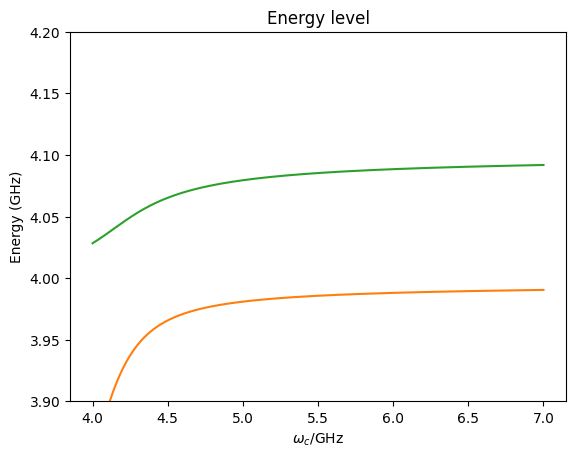

0

In [19]:
# %matplotlib notebook
plt.figure()
pl.plot_Elevel_dynamics(w2_scan_space, energy_level_list, num_level, "\omega_c", yrange = [3.9, 4.2])

### ZZ coupling

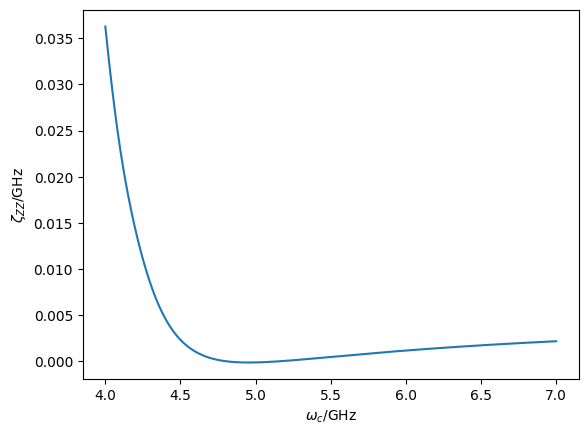

In [115]:
num_level = 3 # Num of level we want to see
w2_scan_space= np.linspace(4, 7, 1000)   # scan coupler frequency
zz_list = []
for w2 in w2_scan_space:
    dummy_list = []; w_dummy = copy.deepcopy(w)
    w_dummy[1] = w2
    _system = qs.TransmonSys(N, q_dim, w_dummy, alpha, r, gamma_list)
    E00 = (_system.H.eigenenergies()[0] / np.pi/2).real
    E01 = (_system.H.eigenenergies()[1] / np.pi/2).real
    E10 = (_system.H.eigenenergies()[2] / np.pi/2).real
    E11 = (_system.H.eigenenergies()[6] / np.pi/2).real
    ZZ = E11 + E00 - E01 - E10
    zz_list.append(ZZ)
    
plt.figure()
plt.plot(w2_scan_space,zz_list)
plt.xlabel(r"$\omega_c$/GHz")
plt.ylabel(r"$\zeta_{ZZ}$/GHz")
plt.show()

### Step up scan pulse

1. Initial the system at $|001\rangle$ ($|100\rangle$).
2. Bias the two qubit on resonance.
3. Sweep the coupler frequency, see the population evolution of state $|001\rangle$ ($|100\rangle$).
4. Find the frequncy that the population will not envolved as time.


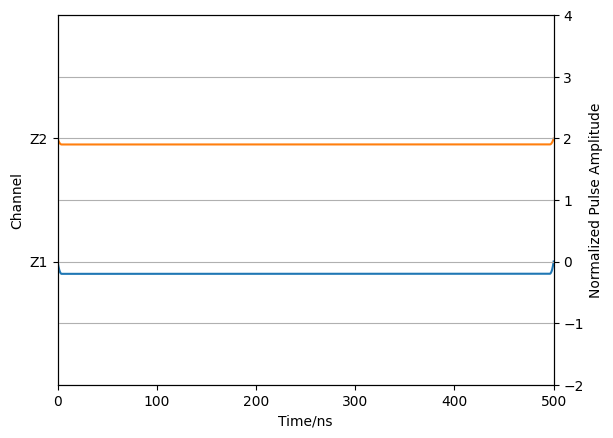

0

In [54]:
simopt = SimulationOption(simu_time=500, simu_point=5000, init_state=[state_001])
pulse_sequence = [
    PulseConfig(
        pulse_index=0,
        pulse_type="Z",
        pulse_shape=PulseShapeFn.COSH,
        t_delay=0,
        t_width=8,
        t_plateau=492,
        frequency=0,
        phase=0,
        amplitude=-0.1,
        qindex=2,
        epsilon=2
    ),
    PulseConfig(
        pulse_index=1,
        pulse_type="Z",
        pulse_shape=PulseShapeFn.COSH,
        t_delay=0,
        t_width=8,
        t_plateau=492,
        frequency=0,
        phase=0,
        amplitude=-0.2,
        qindex=1,
        epsilon=2
    )
]
pl.plot_pulse_sequence(pulse_sequence, simopt)

In [78]:
amprng = [0.32, 0.4]; npts = 200; amp_list= np.linspace(amprng[0], amprng[1], npts)   # scan coupler frequency
result = []
for amp in tqdm(amp_list):
    pulse_sequence[1]["amplitude"] = amp
    _system = qs.TransmonSys(N, q_dim, w, alpha, r, gamma_list)
    result_list, _ = _system.system_dynamics_mesolve(pulse_sequence, simopt)
    y = _system.get_data_list(result_list[0], simopt, [[state_001]])
    y = np.array(y)
    y = y.reshape(-1)
    y = y.tolist()
    result.append(y)
z = np.array(result)
z.shape

100%|██████████| 200/200 [03:50<00:00,  1.15s/it]


(200, 5000)

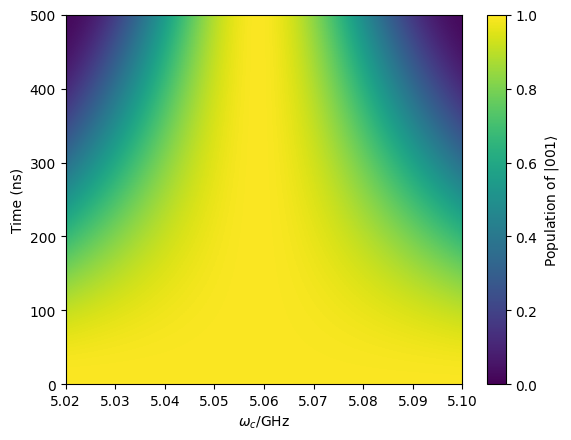

In [79]:
plt.figure()
plt.imshow(z.T, extent = [w[1]+amprng[0], w[1]+amprng[1], 0, simopt.simulation_time], origin = 'lower',aspect = 'auto',vmin=0)
plt.xlabel('$\omega_c$/GHz')
plt.ylabel('Time (ns)')
cb = plt.colorbar()
cb.set_label(r"Population of $|001\rangle$")
plt.show()

In [90]:
w_c_scan = np.linspace(w[1]+amprng[0], w[1]+amprng[1], npts)
tolerance = 7.47e-3  # A small tolerance to account for numerical precision
constant_population_frequencies = []
for i in range(z.shape[0]):  # Loop through each frequency column
    if np.all(np.abs(z[i, :] - 1) < tolerance):
        constant_population_frequencies.append(w_c_scan[i])
constant_population_frequencies

[5.058592964824121]

The cut-off frequency of coupler is given by 
$$
\omega_{cut} = 5.0586 \ \text{GHz}
$$

## Define coupelr idle frequncy
The idle frequency is the frequncy turn off the effective coupling between two qubits when system is under idle state, i.e., all qubits and couplers are envolved under their interinsic Hamiltonian (without the dynamical term $H_d$).

In [4]:
w_cut = 5.0586 # Determined in the previous section
w_idle = round(float(idle_w(w[0], w[2],w_cut)), 4) # Calculate the coupler idle frequency

N = None
w = [4, w_idle, 4.1]
q_dim = [3 for _ in range(len(w))]  # qubit dimension
alpha = [-0.2, -0.15, -0.2]  # Anharmonicity

r_dic = {
    "r12": 0.12,
    "r13": 0.015,
    "r23": 0.12
}

r = tools.r2matrix(r_dic, w)  # Coupling strength
gamma_list = None

_system = qs.TransmonSys(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))
state_002, E_002, index_002 = _system.get_eigenstates_energy((0,0,2))
state_200, E_200, index_200 = _system.get_eigenstates_energy((2,0,0))

### Check 100 and 001 has no coupling in idle state

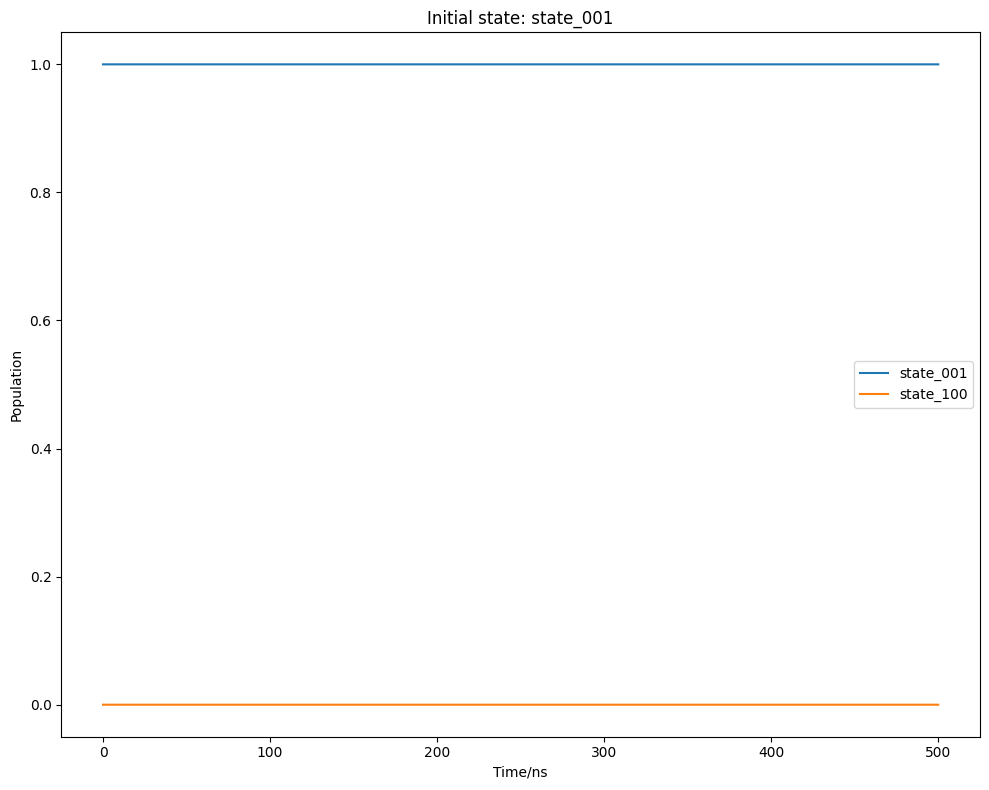

0

In [108]:
simopt = SimulationOption(simu_time=500, simu_point=5000, init_state=[state_001])
pulse_sequence = [
    PulseConfig(
        pulse_index=0,
        pulse_type="Z",
        pulse_shape=PulseShapeFn.COSH,
        t_delay=0,
        t_width=8,
        t_plateau=492,
        frequency=0,
        phase=0,
        amplitude=0,
        qindex=2,
        epsilon=2
    )
]

result_list, _ = _system.system_dynamics_mesolve(pulse_sequence, simopt)

# state that you want to plot each simulation
interested_state = [
                    [state_001, state_100]
                    ]
# Convert the variable name to string in order to make legend in the plot
interested_state_label = var_name2str(interested_state)
initial_state_label = var_name2str(simopt.initial_state)

%matplotlib inline
# plot state population evolution
pl.plot_population_evolution(_system, result_list, simopt, interested_state, interested_state_label, initial_state_label)

## Simulate iSWAP-like gate
### Calculate the idea iSWAP-like gate

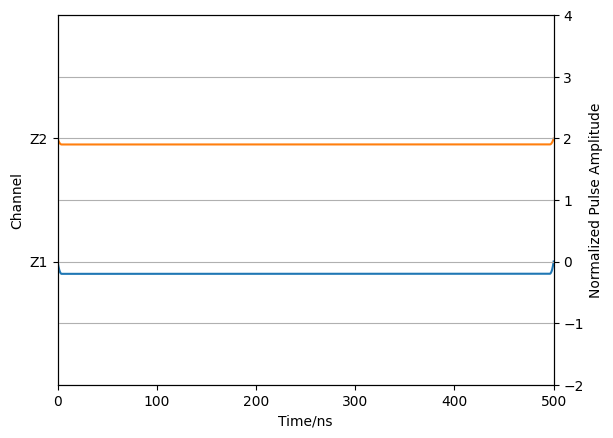

0

In [5]:
N = None
w = [4, 5.111, 4.1]
q_dim = [3 for _ in range(len(w))]  # qubit dimension
alpha = [-0.2, -0.15, -0.2]  # Anharmonicity

r_dic = {
    "r12": 0.12,
    "r13": 0.015,
    "r23": 0.12
}

r = tools.r2matrix(r_dic, w)  # Coupling strength
gamma_list = None

_system = qs.TransmonSys(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))
state_002, E_002, index_002 = _system.get_eigenstates_energy((0,0,2))
state_200, E_200, index_200 = _system.get_eigenstates_energy((2,0,0))

simopt = SimulationOption(simu_time=500, simu_point=5000, init_state=[state_001])
pulse_sequence = [
    PulseConfig(
        pulse_index=0,
        pulse_type="Z",
        pulse_shape=PulseShapeFn.COSH,
        t_delay=0,
        t_width=8,
        t_plateau=492,
        frequency=0,
        phase=0,
        amplitude=-0.1,
        qindex=2,
        epsilon=2
    ),
    PulseConfig(
        pulse_index=1,
        pulse_type="Z",
        pulse_shape=PulseShapeFn.COSH,
        t_delay=0,
        t_width=8,
        t_plateau=492,
        frequency=0,
        phase=0,
        amplitude=-0.2,
        qindex=1,
        epsilon=2
    )
]

pl.plot_pulse_sequence(pulse_sequence, simopt)

In [6]:
result_list, _ = _system.system_dynamics_mesolve(pulse_sequence, simopt) 

In [7]:
prop_result = _system.system_dynamics_propagator(pulse_sequence, simopt)

In [30]:
U = prop_result[-1] # get the Unitary 

# Perform partial trace, tracing out the coupler degree of freedom
slist = [
    state_000, state_001, state_100, state_101
]
sdlist = [
    state_000.dag(), state_001.dag(), state_100.dag(), state_101.dag()
]
dims = [len(sdlist), len(slist)];   umatrix = []
for i in range(dims[0]):
    umatrix_row = []
    for j in range(dims[1]):
        umatrix_row.append(sdlist[i] * U * slist[j])
    umatrix.append(umatrix_row)

uQobj = Qobj(np.array(umatrix).reshape(dims[0],dims[1]), dims = [[int(np.sqrt(dims[0])), int(np.sqrt(dims[0]))], [int(np.sqrt(dims[1])), int(np.sqrt(dims[1]))]])

In [31]:
u00 = uQobj.data[0,0];  u11 = uQobj.data[1,1]/u00
u12 = uQobj.data[1,2]/u00;  u21 = uQobj.data[2,1]/u00
u22 = uQobj.data[2,2]/u00;  u33 = uQobj.data[3,3]/u00

theta, phi, phi1, phi2, phi3, phi4  = fsim_zhen(u11,u12,u21,u22,u33, result_list, state_001, state_100)
ui = np.array([
    [1,0,0,0],
    [0,np.cos(theta),-1j*np.sin(theta),0],
    [0,-1j*np.sin(theta),np.cos(theta),0],
    [0,0,0,phi]])
U_ideal = Qobj(ui, dims=[[2,2],[2,2]])  ### Ideal unitary
U_ideal

[[0.17191813-0.24800246j]]
[[0.93853198-0.16761662j]]
theta: 0.3065417937425839
phi: (0.9262435113342977+0.3757539079958502j)
phi1: (-0.8199546771665613-0.5724284222121012j)
phi2: (-0.9849997923254304+0.17255596677127663j)
phi3: 1
phi4: (0.7088773038466208-0.7053308848090137j)


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.95338283+0.j         0.        -0.30176345j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.30176345j 0.95338283+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.92624351+0.37575391j]]

In [34]:
ph1 = np.conj(phi1)         
ph2 = np.conj(phi2)
ph3 = np.conj(phi3)
ph4 = np.conj(phi4)
R1 = np.array([[1,0,0,0],[0,ph2,0,0],[0,0,ph1,0],[0,0,0,ph1*ph2]])
R2 = np.array([[1,0,0,0],[0,ph4,0,0],[0,0,ph3,0],[0,0,0,ph3*ph4]])
r1 = Qobj(R1, dims=[[2,2],[2,2]])
r2 = Qobj(R2, dims=[[2,2],[2,2]])   #  generate the single qubit gates

U_sim = uQobj/u00
# U_sim = r2*U_sim*r1
U_sim = r2*U_sim*r1
U_sim

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  6.35329344e-07+1.45109881e-06j]
 [ 0.00000000e+00+0.00000000e+00j  9.53381724e-01+0.00000000e+00j
   6.19111677e-07-3.01763233e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-3.01763499e-01j
   9.53382801e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-1.14276980e-06+1.09641731e-06j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.26242412e-01+3.75753462e-01j]]

In [37]:
f = (1/4*(U_sim*U_ideal.dag()).tr())
f = abs(f)
print('Fidelity:{: .5%}'.format(f))##### fidelity

Fidelity: 99.97789%
